# 4. Phase Kickback
Name: Sai Krishna Teja Varma Manthena\
UnityID: smanthe

In [3]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, QuantumRegister, execute, ClassicalRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from math import *

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-10-05 01:56:41,421: Credentials are already in use. The existing account in the session will be replaced.


In [4]:
q = QuantumRegister(2, 'q')
p = QuantumRegister(2, 'p')

qc = QuantumCircuit(q)
qc.barrier()
qc1 = QuantumCircuit(p)
qc1.barrier()

qc.h(q[0])
qc.x(q[1])
qc.cx(q[0], q[1])
qc.barrier()
qc.save_statevector()

qc1.h(p[0])
qc1.x(p[1])
qc1.cp(-(pi)/2, p[0], p[1])
qc1.barrier()
qc1.save_statevector()

In [5]:
backend = Aer.get_backend('aer_simulator_statevector')
job_statevector = execute(qc, backend)
res = job_statevector.result()
print(res.get_statevector())

job_statevector = execute(qc1, backend)
res1 = job_statevector.result()
print(res1.get_statevector())

Statevector([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j,
             0.        +0.j],
            dims=(2, 2))
Statevector([0.00000000e+00+0.j        , 0.00000000e+00+0.j        ,
             7.07106781e-01+0.j        , 4.32978028e-17-0.70710678j],
            dims=(2, 2))


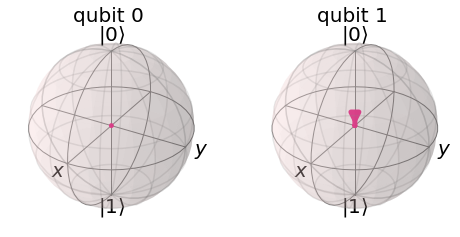

In [6]:
plot_bloch_multivector(res.get_statevector())

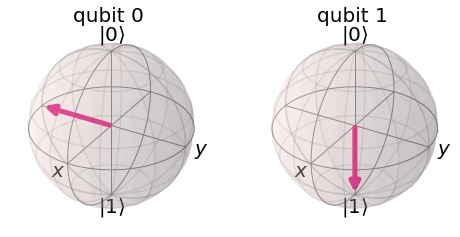

In [7]:
plot_bloch_multivector(res1.get_statevector())

In [9]:
q = QuantumRegister(2, 'q')
p = QuantumRegister(2, 'p')
r = ClassicalRegister(2, 'r')
r2 = ClassicalRegister(2, 'r2')
qc = QuantumCircuit(q,r)
qc.barrier()
qc1 = QuantumCircuit(p,r2)
qc1.barrier()

qc.h(q[0])
qc.x(q[1])
qc.cx(q[0], q[1])
qc.h(q)
qc.barrier()
qc.measure(q,r)

qc1.h(p[0])
qc1.x(p[1])
qc1.cp(-(pi)/2, p[0], p[1])
qc1.h(p)
qc1.barrier()
qc1.measure(p,r2)

{'01': 126, '10': 114, '00': 138, '11': 134}


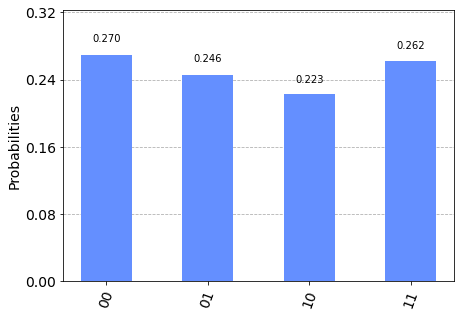

In [10]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc1, backend, shots=512)  # shots default = 1024
result = job.result()
print(result.get_counts())
plot_histogram(result.get_counts())

{'00': 254, '11': 258}


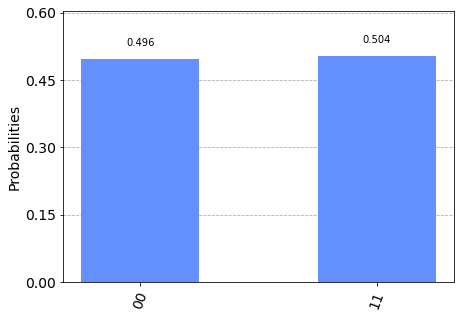

In [11]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=512)  # shots default = 1024
result = job.result()
print(result.get_counts())
plot_histogram(result.get_counts())

In [ ]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-ncsu', group='nc-state', project='grad-qc-class')
backend = provider.get_backend('ibm_cairo') 
job = execute(qc, backend, shots=512)  # shots default = 1024
result = job.result()
print(result.get_counts())
plot_histogram(result.get_counts())

ibmqfactory.load_account:WARNING:2022-10-05 03:15:58,929: Credentials are already in use. The existing account in the session will be replaced.


In [ ]:
job = execute(qc1, backend, shots=512)  # shots default = 1024
result = job.result()
print(result.get_counts())
plot_histogram(result.get_counts())